# EXPLORATORY ANALYSIS
## TRIPADVISOR: HOTELS

*   Esteban Ariza
*   Johan Giraldo
*   Mateo Valdes

## Prerequisites

### Install python libraries

In [1]:
# %pip install pandas
# %pip install seaborn
# %pip install numpy
# %pip install regex
# %pip install matplotlib
# %pip install scipy
# %pip install PyEnchant

### Install exporter

In [2]:
# Windows
# !choco install pandoc
# !choco install miktex.install

#Linux
# %sudo apt-get install pandoc
# %sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# !pip3 install --upgrade pip
# !pip3 install jupyter
# %pip install nbconvert[webpdf]
# %export PATH=/Library/TeX/texbin:$PATH

### Import python libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import datetime

### Import data (CSV)

#### From Google Drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# HOTEL_DATA_PATH = '/content/drive/MyDrive/Estudio/9 Semestre/Inteligencia Artificial II/TripAdvisor/data.csv'
# HOTEL_DATA = pd.read_csv(HOTEL_DATA_PATH)

#### Local


In [5]:
HOTEL_DATA_PATH_1 = '../data/web_scraping/outputs/tripadvisor_hotels_nonsustainables_v2.csv'
HOTEL_DATA_1 = pd.read_csv(HOTEL_DATA_PATH_1)
HOTEL_DATA_1['HOTEL_SUSTAINABLE'] = "NO"

HOTEL_DATA_PATH_2 = '../data/web_scraping/outputs/tripadvisor_hotels_sustainables_v2.csv'
HOTEL_DATA_2 = pd.read_csv(HOTEL_DATA_PATH_2)
HOTEL_DATA_2['HOTEL_SUSTAINABLE'] = "YES"

HOTEL_DATA = pd.concat([HOTEL_DATA_1, HOTEL_DATA_2])

## Data Review

In [6]:
HOTEL_DATA

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE
0,Hotel Restaurant VILLINO,bubble_50,NaN,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,bubble_50,Date of stay: September 2022,NaN,"Stayed here 5 nights. Immaculate rooms, beauti...",NO
1,Hotel Restaurant VILLINO,bubble_50,NaN,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,bubble_50,Date of stay: July 2022,NaN,The stay in this hotel was magnificent. It has...,NO
2,Hotel Restaurant VILLINO,bubble_50,NaN,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,bubble_50,Date of stay: July 2020,2 Helpful votes,"Wow, what a find! We stayed in this beautiful ...",NO
3,Hotel Restaurant VILLINO,bubble_50,NaN,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,bubble_50,Date of stay: February 2020,2 Helpful votes,we had only 1 night as a weekend break. Arrivi...,NO
4,Hotel Restaurant VILLINO,bubble_50,NaN,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,bubble_50,Date of stay: December 2019,1 Helpful vote,We stayed in the Hotel Villino for three night...,NO
...,...,...,...,...,...,...,...,...,...,...
16898,The Yeatman,bubble_45,€390,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,bubble_50,Date of stay: May 2017,1 Helpful vote,This is one of my favourite hotels- very beaut...,YES
16899,The Yeatman,bubble_45,€390,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,bubble_50,Date of stay: April 2017,1 Helpful vote,Our party really enjoyed the fabulous setting ...,YES
16900,The Yeatman,bubble_45,€390,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,bubble_50,Date of stay: April 2017,3 Helpful votes,We had a Superior room. Very nice and spacious...,YES
16901,The Yeatman,bubble_45,€390,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,bubble_50,Date of stay: May 2017,3 Helpful votes,"Great welcome, a chair to sit down during the ...",YES


In [7]:
HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85112 entries, 0 to 16902
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HOTEL_NAME            85112 non-null  object
 1   HOTEL_RATING          85112 non-null  object
 2   HOTEL_PRICE           74541 non-null  object
 3   HOTEL_LOCATION        85112 non-null  object
 4   HOTEL_REVIEW_URL      85112 non-null  object
 5   REVIEW_RATING         85112 non-null  object
 6   REVIEW_DATE           85102 non-null  object
 7   REVIEW_HELPFUL_VOTES  83501 non-null  object
 8   REVIEW_TEXT           85112 non-null  object
 9   HOTEL_SUSTAINABLE     85112 non-null  object
dtypes: object(10)
memory usage: 7.1+ MB


The csv have 8 columns and only 2 of them contain null values. There are some adjustments we should do to each column:
* **HOTEL_NAME:** The first number should be eliminated from the name.
* **HOTEL_RATING:** The rating must be a integer number from 1 to 5.
* **HOTEL_PRICE:** The currency must be removed and the price should be numeric. Also, there are some rows that contain NaN values, so we are going to transform those into 0.
* **REVIEW_RATING:** The same as the "HOTEL_RATING"
* **REVIEW_DATE:** The phrase "Date of stay:" should be removed.
* **REVIEW_HELPFUL_VOTES** We should remove the phrase "helpful vote(s)". Also, there are some rows that contain NaN values, so we are going to transform those into 0.



## Data Cleaning



### Cleaning functions

In [8]:
def clean_int(column, pattern):
    return column.replace(pattern, '', regex = True).astype(np.int64)

def clean_string(column, pattern):
    return column.replace(pattern, '', regex = True)

#### HOTEL_NAME

In [9]:
def clean_hotel_name_map(value):
  vals = value.split('.')
  try:
    int(vals[0]) #the first one must be a number
    value = '.'.join(vals[1:])
  finally:
    return value

def clean_hotel_name(column):
  return column.map(clean_hotel_name_map)

#### HOTEL_RATING

In [10]:
def clean_hotel_rating_map(value):
  return value.split('_')[1]

def clean_hotel_rating(column):
  return column.map(clean_hotel_rating_map).astype(np.int64)

#### HOTEL_PRICE

In [11]:
CURRENCY = '€'

def clean_hotel_price_map(value):
  if pd.isnull(value):
    return 0;

  value = value.replace(CURRENCY, '')
  value = value.replace(',','')
  try:
    value = float(value)
  except:
    value = 0;
  finally:
    return value

def clean_hotel_price(column):
  return column.map(clean_hotel_price_map)

#### REVIEW_RATING

In [12]:
def clean_review_rating(column):
  return (clean_int(column,'[bubble_.]') / 10).astype(np.int64)

#### REVIEW_DATE

In [13]:
def parseDate(strDate):
  strMonth, strYear = strDate.split(' ')
  strYear = int(strYear)
  strMonth = datetime.datetime.strptime(strMonth[0:3],'%b').month
  date = pd.Timestamp(year=strYear, month=strMonth, day=1)
  return date

def clean_review_date(column):
  column = column.str[14:]
  column = column.map(parseDate)
  return column

def dropnan_review_date(df):
  return df.dropna(subset=['REVIEW_DATE'])

#### REVIEW_HELPFUL_VOTES

In [14]:
def clean_review_helpful_votes_map(value):
    if pd.isnull(value):
        return 0;
    
    return value.split(" ")[0]

def clean_review_helpful_votes(column):
    return column.map(clean_review_helpful_votes_map).astype(np.int64)

### Cleaning

In [15]:
pd.options.mode.chained_assignment = None

HOTEL_DATA['HOTEL_NAME'] = clean_hotel_name(HOTEL_DATA['HOTEL_NAME'])
HOTEL_DATA['HOTEL_RATING'] = clean_hotel_rating(HOTEL_DATA['HOTEL_RATING'])
HOTEL_DATA['HOTEL_PRICE'] = clean_hotel_price(HOTEL_DATA['HOTEL_PRICE'])
HOTEL_DATA['REVIEW_RATING'] =  clean_review_rating(HOTEL_DATA['REVIEW_RATING'])
HOTEL_DATA['REVIEW_HELPFUL_VOTES'] = clean_review_helpful_votes(HOTEL_DATA['REVIEW_HELPFUL_VOTES'])

HOTEL_DATA = dropnan_review_date(HOTEL_DATA)
HOTEL_DATA['REVIEW_DATE'] = clean_review_date(HOTEL_DATA['REVIEW_DATE'])

HOTEL_DATA

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE
0,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-09-01,0,"Stayed here 5 nights. Immaculate rooms, beauti...",NO
1,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-07-01,0,The stay in this hotel was magnificent. It has...,NO
2,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2020-07-01,2,"Wow, what a find! We stayed in this beautiful ...",NO
3,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2020-02-01,2,we had only 1 night as a weekend break. Arrivi...,NO
4,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2019-12-01,1,We stayed in the Hotel Villino for three night...,NO
...,...,...,...,...,...,...,...,...,...,...
16898,The Yeatman,45,390.0,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,5,2017-05-01,1,This is one of my favourite hotels- very beaut...,YES
16899,The Yeatman,45,390.0,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,5,2017-04-01,1,Our party really enjoyed the fabulous setting ...,YES
16900,The Yeatman,45,390.0,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,5,2017-04-01,3,We had a Superior room. Very nice and spacious...,YES
16901,The Yeatman,45,390.0,"Rua de Choupelo, Vila Nova de Gaia 4400-088 Po...",https://www.tripadvisor.com/Hotel_Review-g5802...,5,2017-05-01,3,"Great welcome, a chair to sit down during the ...",YES


## Data Analysis

### GENERAL

In [16]:
HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85102 entries, 0 to 16902
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   HOTEL_NAME            85102 non-null  object        
 1   HOTEL_RATING          85102 non-null  int64         
 2   HOTEL_PRICE           85102 non-null  float64       
 3   HOTEL_LOCATION        85102 non-null  object        
 4   HOTEL_REVIEW_URL      85102 non-null  object        
 5   REVIEW_RATING         85102 non-null  int64         
 6   REVIEW_DATE           85102 non-null  datetime64[ns]
 7   REVIEW_HELPFUL_VOTES  85102 non-null  int64         
 8   REVIEW_TEXT           85102 non-null  object        
 9   HOTEL_SUSTAINABLE     85102 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 7.1+ MB


In [17]:
HOTEL_DATA.describe()

,HOTEL_RATING,HOTEL_PRICE,REVIEW_RATING,REVIEW_HELPFUL_VOTES
count,85102.000000,85102.000000,85102.000000,85102.000000
mean,46.223473,355.249606,4.637999,1.410519
std,2.969000,377.259437,0.802392,1.919522
min,35.000000,0.000000,1.000000,0.000000
25%,45.000000,148.000000,5.000000,1.000000
50%,45.000000,237.000000,5.000000,1.000000
75%,50.000000,463.000000,5.000000,2.000000
max,50.000000,3001.000000,5.000000,209.000000


### REVIEWS

In [18]:
# DF - REVIEW LENGTH (Add new col REVIEW TEXT LENGTH)
REVIEW_LENGTH_HOTEL_DATA = HOTEL_DATA.copy()
REVIEW_LENGTH_HOTEL_DATA["REVIEW_TEXT_LENGTH"] = REVIEW_LENGTH_HOTEL_DATA["REVIEW_TEXT"].map(len)

#### REVIEW_RATING

In [19]:
REVIEW_LENGTH_HOTEL_DATA.sort_values(by = ['REVIEW_RATING'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE,REVIEW_TEXT_LENGTH
0,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-09-01,0,"Stayed here 5 nights. Immaculate rooms, beauti...",NO,432
53342,The Pucic Palace,45,267.0,"Ulica Od Puca 1, Dubrovnik 20000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2953...,5,2015-07-01,1,It's not the cheapest hotel but if you want to...,NO,663
53349,The Pucic Palace,45,267.0,"Ulica Od Puca 1, Dubrovnik 20000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2953...,5,2015-07-01,2,Spent only two days there in July but had a wo...,NO,243
53347,The Pucic Palace,45,267.0,"Ulica Od Puca 1, Dubrovnik 20000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2953...,5,2015-06-01,2,Lovely hotel - large room with huge comfortabl...,NO,274
53346,The Pucic Palace,45,267.0,"Ulica Od Puca 1, Dubrovnik 20000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2953...,5,2015-07-01,2,"Excellent location and helpful, friendly staff...",NO,283
...,...,...,...,...,...,...,...,...,...,...,...
54910,"Le Meridien Lav, Split",40,163.0,"Grljevacka, Podstrana 21312 Croatia",https://www.tripadvisor.com/Hotel_Review-g6705...,1,2021-08-01,1,"1st, the location is outstanding. Nice pool ...",NO,377
48239,Amadria Park Hotel Milenij,45,199.0,"Marshala Tita 109, Opatija 51410 Croatia",https://www.tripadvisor.com/Hotel_Review-g2975...,1,2014-02-01,2,We thought they were joking when we were given...,NO,422
18389,Hotel Cappuccino,40,355.0,"Plaza de Cort, 07001 Palma de Mallorca, Majorc...",https://www.tripadvisor.com/Hotel_Review-g1874...,1,2022-10-01,0,Waiter and manager is so impolite specifically...,NO,207
18392,Hotel Cappuccino,40,355.0,"Plaza de Cort, 07001 Palma de Mallorca, Majorc...",https://www.tripadvisor.com/Hotel_Review-g1874...,1,2022-08-01,0,Stayed for 6 days recently. £6000 for two room...,NO,593


#### REVIEW_TEXT

In [20]:
REVIEW_LENGTH_HOTEL_DATA.sort_values(by = ['REVIEW_TEXT_LENGTH'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE,REVIEW_TEXT_LENGTH
14771,Falkensteiner Hotel & Spa Iadera,45,159.0,"Ulica 1/151, Zadar 23231 Croatia",https://www.tripadvisor.com/Hotel_Review-g2953...,4,2022-09-01,0,"Reading through some of the recent reviews, I ...",YES,7388
33080,Four Seasons Hotel Prague,50,540.0,"Veleslavinova 1098/2A, Prague 110 00 Czech Rep...",https://www.tripadvisor.com/Hotel_Review-g2747...,5,2022-08-01,3,A few years back a friend was invited to atten...,NO,7073
9863,"Cipriani, A Belmond Hotel, Venice",45,950.0,"Giudecca 10, 30133 Venice Italy",https://www.tripadvisor.com/Hotel_Review-g1878...,4,2022-09-01,0,Our stay would have been pure LA Dolce Vita if...,NO,7018
5671,Lily of the Valley,45,0.0,"Boulevard Abel Faivre Colline Saint-Michel, Qu...",https://www.tripadvisor.com/Hotel_Review-g1966...,3,2022-04-01,1,We were looking for a peaceful couples retreat...,NO,6912
6679,Culinair Landgoed Parc Broekhuizen,45,210.0,"Broekhuizerlaan 2, 3956 NS Leersum The Netherl...",https://www.tripadvisor.com/Hotel_Review-g3665...,1,2019-10-01,5,Described as a 'Culinary Destination' thanks t...,YES,6371
...,...,...,...,...,...,...,...,...,...,...,...
42999,Hotel Klosterbrau & SPA,45,458.0,"Klosterstraße 30, Seefeld in Tirol 6100 Austria",https://www.tripadvisor.com/Hotel_Review-g3197...,5,2009-06-01,1,"Very good service , nice SPA and very good res...",NO,57
35416,Hotel Three Storks,45,98.0,"Valdstejnske Namesti 20/8, Prague 118 00 Czech...",https://www.tripadvisor.com/Hotel_Review-g2747...,4,2012-01-01,1,"The hotel in good location, sleep quality and ...",NO,56
12663,Relais Santa Croce by Baglioni Hotels & Resorts,45,712.0,"Via Ghibellina 87, 50122, Florence Italy",https://www.tripadvisor.com/Hotel_Review-g1878...,5,2007-11-01,1,"Beautiful place, a pure luxury and really roma...",NO,53
45228,Hotel Sonnenburg,45,0.0,"Oberlech 55, Lech 6764 Austria",https://www.tripadvisor.com/Hotel_Review-g2620...,5,2011-02-01,1,"Perfect location, excellent food - an enjoyabl...",NO,52


#### REVIEW DATE

In [21]:
REVIEW_LENGTH_HOTEL_DATA.sort_values(by = ['REVIEW_DATE'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE,REVIEW_TEXT_LENGTH
58178,Andrassy Kuria & Spa,45,0.0,"Fo utca 94, Tarcal 3915 Hungary",https://www.tripadvisor.com/Hotel_Review-g1099...,5,2022-10-01,0,"Quiet and calm hotel, the staff gave excellen...",NO,362
66131,W Algarve,45,305.0,"Estrada da Gale, Sesmarias, Albufeira 8200-385...",https://www.tripadvisor.com/Hotel_Review-g5784...,5,2022-10-01,0,"The W Algarve is a stunning, very funky, moder...",NO,688
49386,Esplanade Zagreb Hotel,45,139.0,"Mihanoviceva 1, Zagreb 10000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2944...,3,2022-10-01,0,We were so looking forward to spending our las...,NO,1582
65140,"Reid's Palace, A Belmond Hotel, Madeira",45,810.0,"Estrada Monumental 139, Funchal, Madeira 9000-...",https://www.tripadvisor.com/Hotel_Review-g1891...,5,2022-10-01,1,Fantastic hotel overlooking the ocean and Func...,NO,254
43957,Rosewood Vienna,50,663.0,"Petersplatz 7, Vienna 1010 Austria",https://www.tripadvisor.com/Hotel_Review-g1904...,5,2022-10-01,0,Oktoberfest in Munich was always on my bucket ...,NO,3071
...,...,...,...,...,...,...,...,...,...,...,...
40723,Grandhotel Pupp,40,0.0,"Mirove Namesti 2, Karlovy Vary 360 01 Czech Re...",https://www.tripadvisor.com/Hotel_Review-g2746...,5,2004-07-01,1,We stayed for in July 2004 in this traditional...,NO,111
40712,Grandhotel Pupp,40,0.0,"Mirove Namesti 2, Karlovy Vary 360 01 Czech Re...",https://www.tripadvisor.com/Hotel_Review-g2746...,5,2004-07-01,1,My wife and I stayed there during our honeymoo...,NO,214
2858,Schlosshotel Munchhausen,45,0.0,"Schwoebber 9, 31855 Aerzen, Lower Saxony Germany",https://www.tripadvisor.com/Hotel_Review-g1183...,5,2004-05-01,1,The Hotel is superb! Restaurants are excellent...,NO,89
43952,Interalpen-Hotel Tyrol,50,544.0,"Dr.-Hans-Liebherr-Alpenstrasse 1 Buchen, Telfs...",https://www.tripadvisor.com/Hotel_Review-g1165...,4,2004-04-01,1,The combination of the stunning location and i...,NO,788


### HOTELS

In [22]:
# DF - GENERAL HOTEL DATA (The hotel cols)
GENERAL_HOTEL_DATA = HOTEL_DATA.groupby(["HOTEL_NAME", "HOTEL_RATING","HOTEL_PRICE","HOTEL_LOCATION","HOTEL_REVIEW_URL","HOTEL_SUSTAINABLE"]).size().reset_index(name='HOTEL_REVIEW_COUNT') # COUNT
GENERAL_HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOTEL_NAME          328 non-null    object 
 1   HOTEL_RATING        328 non-null    int64  
 2   HOTEL_PRICE         328 non-null    float64
 3   HOTEL_LOCATION      328 non-null    object 
 4   HOTEL_REVIEW_URL    328 non-null    object 
 5   HOTEL_SUSTAINABLE   328 non-null    object 
 6   HOTEL_REVIEW_COUNT  328 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.1+ KB


#### HOTEL_RATING

In [23]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_RATING'], ascending = True)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,HOTEL_SUSTAINABLE,HOTEL_REVIEW_COUNT
206,Largo Waterrijk Oesterdam,35,0.0,"Oesterdam 3, 4691 PV Tholen The Netherlands",https://www.tripadvisor.com/Hotel_Review-g1733...,YES,3
96,Grand Hotel Amrath Kurhaus The Hague Scheveningen,35,111.0,"Gevers Deynootplein 30, 2586 CK, The Hague The...",https://www.tripadvisor.com/Hotel_Review-g1886...,NO,500
132,Hotel Divinus,35,0.0,"Nagyerdei korut 1., Debrecen 4032 Hungary",https://www.tripadvisor.com/Hotel_Review-g2748...,NO,159
117,Hotel Ambasador - Liburnia,40,179.0,"Feliksa Persica 5, Opatija 51410 Croatia",https://www.tripadvisor.com/Hotel_Review-g2975...,NO,339
34,Bilderberg Garden Hotel,40,194.0,"Dijsselhofplantsoen 7, 1077 BJ Amsterdam The N...",https://www.tripadvisor.com/Hotel_Review-g1885...,NO,500
...,...,...,...,...,...,...,...
176,Hotel Spa Dr Irena Eris Polanica Zdroj,50,0.0,"Ul. Dębowa 19B, Polanica Zdroj 57-320 Poland",https://www.tripadvisor.com/Hotel_Review-g2748...,NO,81
177,Hotel Splendide Royal Paris,50,1019.0,"18 rue du Cirque, 75008 Paris France",https://www.tripadvisor.com/Hotel_Review-g1871...,NO,102
183,Hotel TwentySeven,50,625.0,"Dam 27, 1012 JS Amsterdam The Netherlands",https://www.tripadvisor.com/Hotel_Review-g1885...,NO,126
165,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,NO,98


#### HOTEL_PRICE

In [24]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_PRICE'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,HOTEL_SUSTAINABLE,HOTEL_REVIEW_COUNT
186,"Hotel de Crillon, A Rosewood Hotel",45,3001.0,"10 Place de la Concorde 8th Arrondissement, 75...",https://www.tripadvisor.com/Hotel_Review-g1871...,NO,296
306,"The Gritti Palace, a Luxury Collection Hotel, ...",50,2032.0,"Campo Santa Maria del Giglio 2467, 30124 Venic...",https://www.tripadvisor.com/Hotel_Review-g1878...,YES,498
211,Le Meurice,45,1800.0,"228 rue de Rivoli, 75001 Paris France",https://www.tripadvisor.com/Hotel_Review-g1871...,NO,490
207,Le Bristol Paris,50,1785.0,"112 rue du Faubourg Saint Honore 8th Arr., 750...",https://www.tripadvisor.com/Hotel_Review-g1871...,YES,500
202,La Reserve Paris - Hotel and Spa,50,1591.0,"42 avenue Gabriel, 75008 Paris France",https://www.tripadvisor.com/Hotel_Review-g1871...,NO,295
...,...,...,...,...,...,...,...
77,DoubleTree by Hilton Zagreb,45,0.0,"Ulica Grada Vukovara 269a, Zagreb 10000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2944...,YES,500
141,Hotel Grandezza,45,0.0,"Zelny trh 314/2, Brno 602 00 Czech Republic",https://www.tripadvisor.com/Hotel_Review-g2747...,NO,288
135,Hotel Engel Obertal,45,0.0,"Rechtmurgstr. 28, 72270, Baiersbronn, Baden-Wü...",https://www.tripadvisor.com/Hotel_Review-g1872...,YES,15
78,EALA My Lakeside Dream,45,0.0,"Via IV Novembre, 86, 25010 Limone sul Garda Italy",https://www.tripadvisor.com/Hotel_Review-g2278...,NO,13


#### HOTEL_REVIEW_COUNTS

In [25]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_REVIEW_COUNT'], ascending = False).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,HOTEL_SUSTAINABLE,HOTEL_REVIEW_COUNT
77,DoubleTree by Hilton Zagreb,45,0.0,"Ulica Grada Vukovara 269a, Zagreb 10000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2944...,YES,500
260,"Reid's Palace, A Belmond Hotel, Madeira",45,810.0,"Estrada Monumental 139, Funchal, Madeira 9000-...",https://www.tripadvisor.com/Hotel_Review-g1891...,NO,500
96,Grand Hotel Amrath Kurhaus The Hague Scheveningen,35,111.0,"Gevers Deynootplein 30, 2586 CK, The Hague The...",https://www.tripadvisor.com/Hotel_Review-g1886...,NO,500
93,Four Seasons Hotel Prague,50,540.0,"Veleslavinova 1098/2A, Prague 110 00 Czech Rep...",https://www.tripadvisor.com/Hotel_Review-g2747...,NO,500
289,Sheraton Zagreb Hotel,40,102.0,"2 Kneza Borne, Donji Grad, Zagreb 10000 Croatia",https://www.tripadvisor.com/Hotel_Review-g2944...,NO,500


## Visualization

### HOTELS PRICE

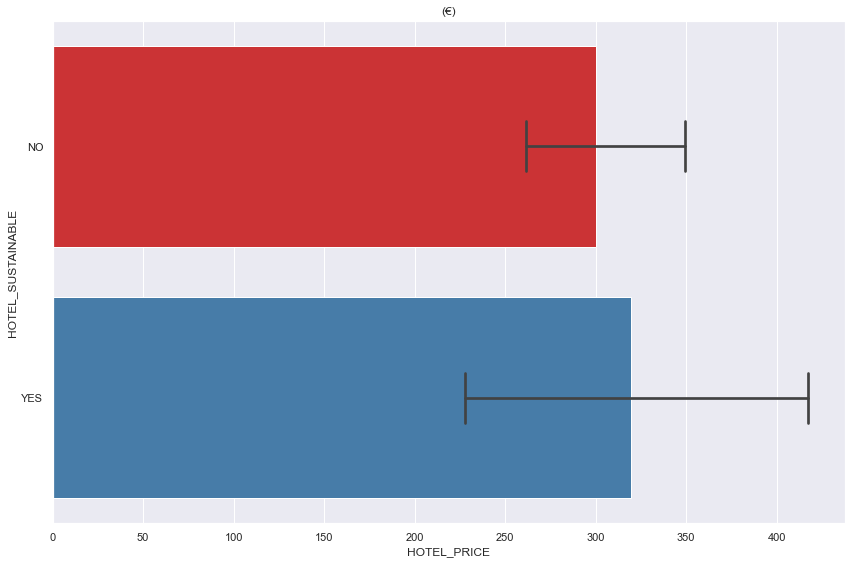

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_PRICE", y="HOTEL_SUSTAINABLE", data=GENERAL_HOTEL_DATA, capsize=.2, palette='Set1').set(title='('+CURRENCY+')')

plt.tight_layout(h_pad=2)

### HOTELS NUMBER OF REVIEWS

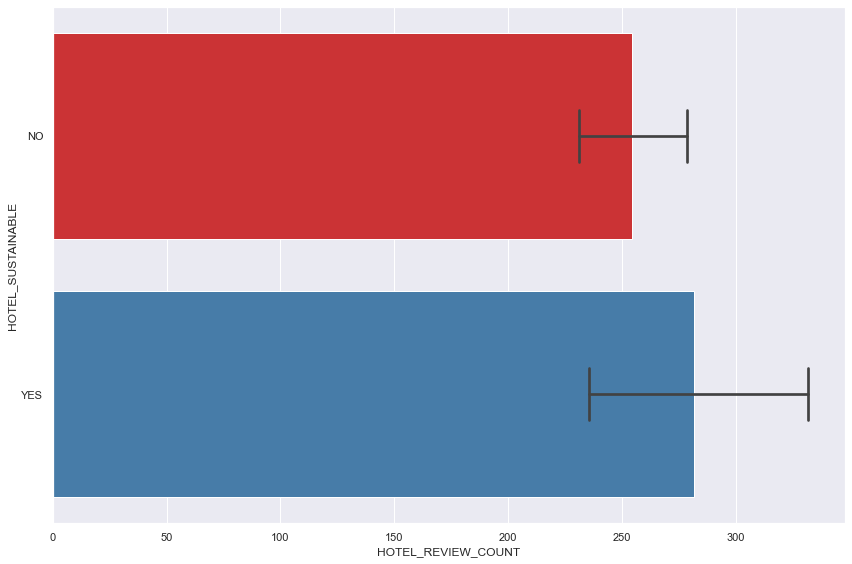

In [27]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_REVIEW_COUNT", y="HOTEL_SUSTAINABLE", data=GENERAL_HOTEL_DATA, capsize=.2, palette='Set1')

plt.tight_layout(h_pad=2)

### HOTELS REVIEW RATING

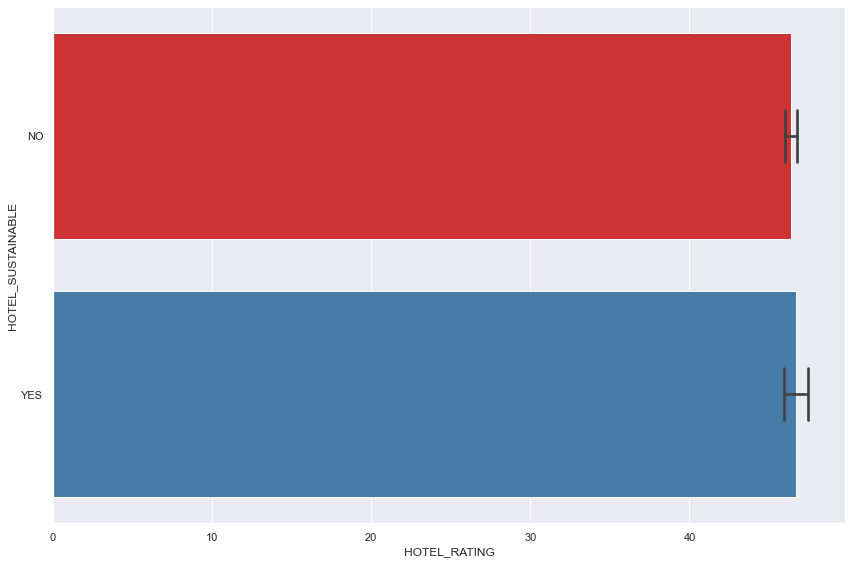

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_RATING", y="HOTEL_SUSTAINABLE", data=GENERAL_HOTEL_DATA, capsize=.2, palette='Set1')

plt.tight_layout(h_pad=2)

### REVIEWS OVER TIME

In [33]:
def date_to_float(date):
  return date.year+((date.month-1)/12)

# DF - OVERTIME (REVIEW_DATE as FLOAT)
OVERTIME_HOTEL_DATA = HOTEL_DATA.copy()
OVERTIME_HOTEL_DATA['REVIEW_DATE'] = OVERTIME_HOTEL_DATA['REVIEW_DATE'].map(date_to_float)

ValueError: cannot reindex from a duplicate axis

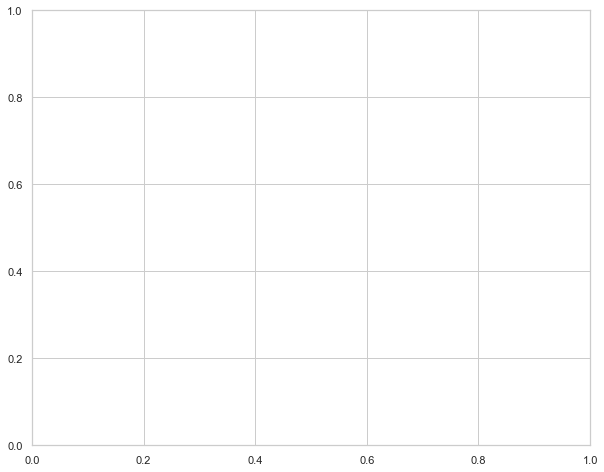

In [45]:
sns.set_theme(style="whitegrid")
plot = sns.kdeplot(data = OVERTIME_HOTEL_DATA, x = 'REVIEW_DATE', hue="HOTEL_SUSTAINABLE", palette="Set1")

plt.show()

### REVIEW RATING OVER TIME

In [35]:
# DF - YEARLY (REVIEW_DATE as FLOAT)
from unicodedata import category


YEARLY_HOTEL_DATA = OVERTIME_HOTEL_DATA.copy()
YEARLY_HOTEL_DATA['REVIEW_YEAR'] = YEARLY_HOTEL_DATA['REVIEW_DATE'].astype(int).astype("category")

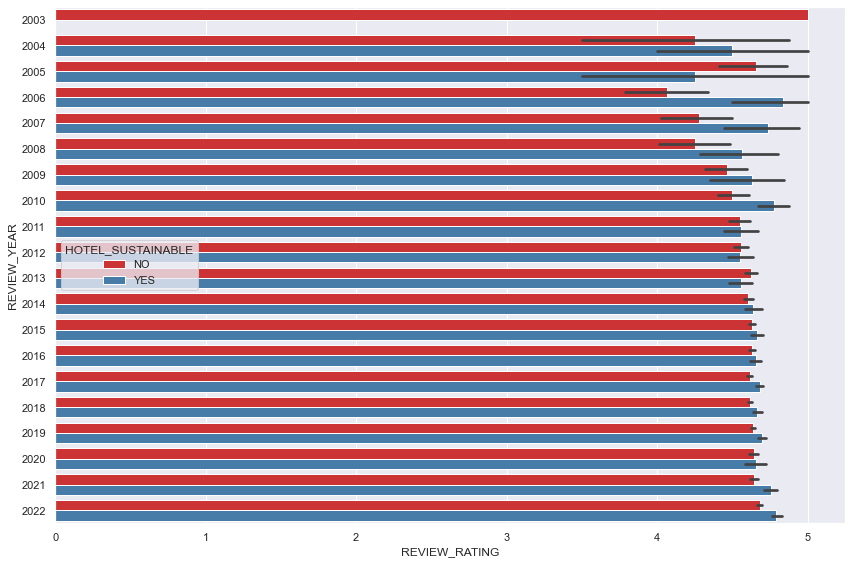

In [36]:
sns.set(rc={'figure.figsize':(12,8)})
plot = sns.barplot(data = YEARLY_HOTEL_DATA, y ='REVIEW_YEAR', x = 'REVIEW_RATING', hue="HOTEL_SUSTAINABLE", palette="Set1")

plt.tight_layout(h_pad=2)

### AVERAGE REVIEW RATING BY MONTH

In [37]:
def date_to_month(date):
  return date.month

def month_to_name(month):
  return datetime.date(2022, month, 2).strftime('%B')

# DF - MONTHLY (REVIEW_DATE as FLOAT)
MONTHLY_HOTEL_DATA = HOTEL_DATA.copy()
MONTHLY_HOTEL_DATA['REVIEW_DATE'] = MONTHLY_HOTEL_DATA['REVIEW_DATE'].map(date_to_month)
MONTHLY_HOTEL_DATA['REVIEW_MONTH'] = MONTHLY_HOTEL_DATA['REVIEW_DATE'].map(month_to_name)
MONTHLY_HOTEL_DATA = MONTHLY_HOTEL_DATA.sort_values(by = ['REVIEW_DATE','HOTEL_SUSTAINABLE'])

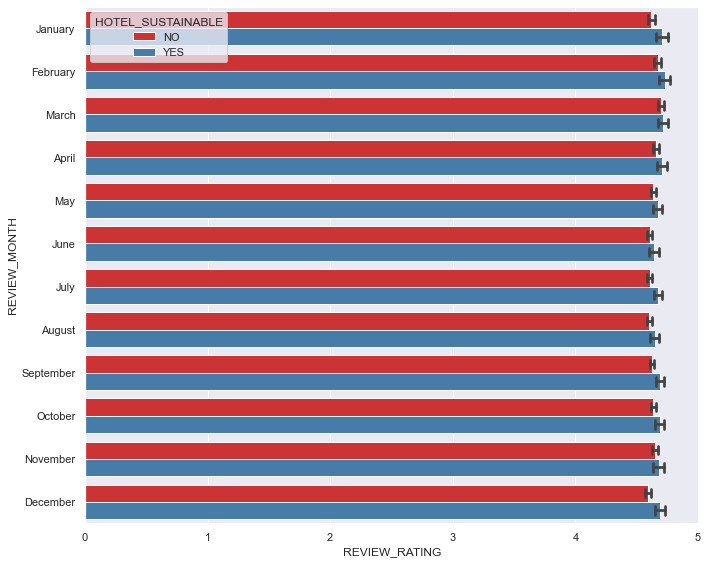

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="REVIEW_RATING", y="REVIEW_MONTH", hue="HOTEL_SUSTAINABLE", data=MONTHLY_HOTEL_DATA, capsize=.2, palette='Set1')

plt.tight_layout(h_pad=2)

### NUMBER OF REVIEWS OVER TIME

In [41]:
# DF - OVERTIME REVIEW COUNT (With columns: REVIEW_DATE as FLOAT, HOTEL_REVIEW_COUNT)
REVIEW_HOTEL_DATA = OVERTIME_HOTEL_DATA.groupby(["REVIEW_DATE","HOTEL_SUSTAINABLE"]).size().reset_index(name='HOTEL_REVIEW_COUNT')

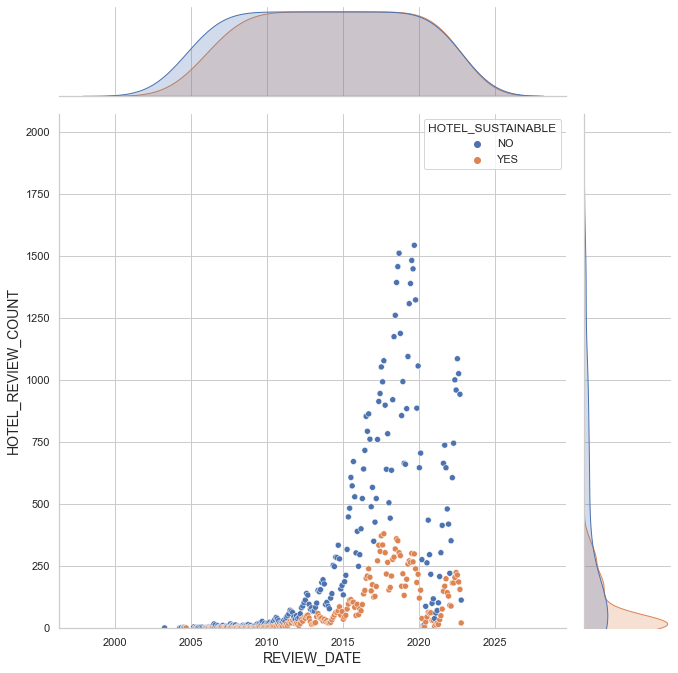

In [42]:
sns.set_theme(style="whitegrid")
plot = sns.jointplot(data = REVIEW_HOTEL_DATA, x = 'REVIEW_DATE', y = 'HOTEL_REVIEW_COUNT', hue="HOTEL_SUSTAINABLE")

plot.fig.set_size_inches(10,10)

plot.set_axis_labels('REVIEW_DATE', 'HOTEL_REVIEW_COUNT', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

### NUMBER OF REVIEWS BY MONTH

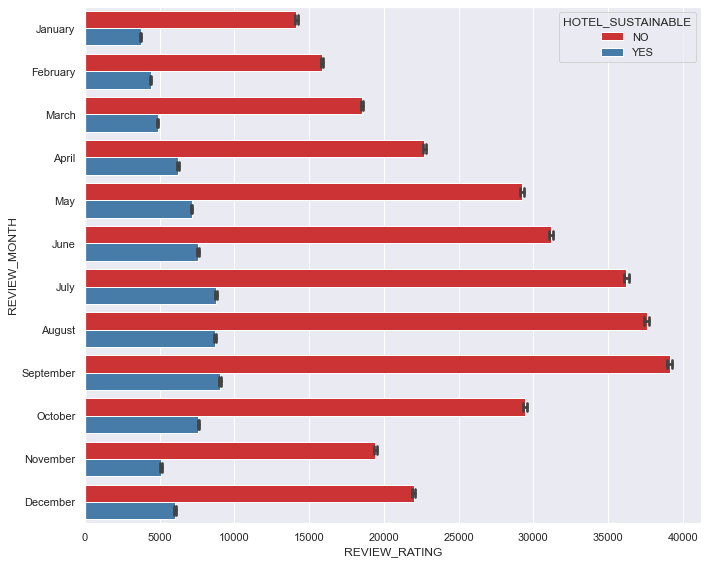

In [43]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="REVIEW_RATING", y="REVIEW_MONTH", hue="HOTEL_SUSTAINABLE", data=MONTHLY_HOTEL_DATA, capsize=.2, estimator=sum, palette='Set1')

plt.tight_layout(h_pad=2)

### HOTELS VARIABLES CORRELATION

In [47]:
def sustainable_as_int_map(value):
    if value == "YES":
        return True
    return False

#DF - HOTEL SUSTAINABLE AS INT
GENERAL_HOTEL_DATA_INT_SUSTAINABLE = GENERAL_HOTEL_DATA
GENERAL_HOTEL_DATA_INT_SUSTAINABLE["HOTEL_SUSTAINABLE"] = GENERAL_HOTEL_DATA_INT_SUSTAINABLE["HOTEL_SUSTAINABLE"].map(sustainable_as_int_map)

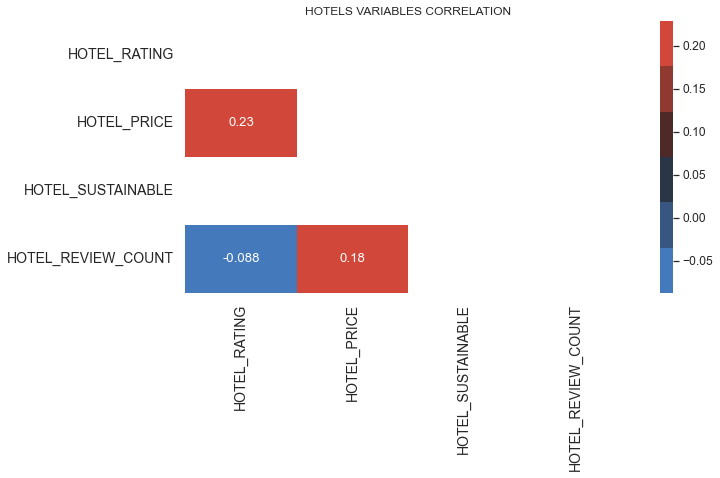

In [48]:
sns.set_theme(style="white")
fig, axs = plt.subplots(figsize = (10,5))
plt.title('HOTELS VARIABLES CORRELATION')
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
cmap = sns.diverging_palette(250, 15, center="dark")

corr = GENERAL_HOTEL_DATA_INT_SUSTAINABLE.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)

plt.show()
# GENERAL_HOTEL_DATA

### HOTEL PRICE DISTRIBUTION BY REVIEW RATING

In [49]:
# DF - RATING AS CATEGORY
RATING_AS_CATEGORY_HOTEL_DATA = HOTEL_DATA.copy()
RATING_AS_CATEGORY_HOTEL_DATA['REVIEW_RATING'] = RATING_AS_CATEGORY_HOTEL_DATA['REVIEW_RATING'].astype("category")

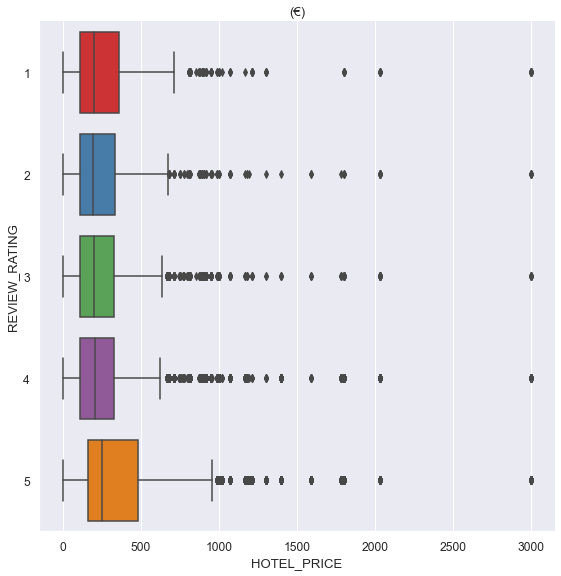

In [50]:
plot = sns.catplot(data=RATING_AS_CATEGORY_HOTEL_DATA, x="HOTEL_PRICE", y="REVIEW_RATING", kind="box", height=8, palette="Set1").set(title='('+CURRENCY+')')

### REVIEW LENGTH DISTRIBUTION BY REVIEW RATING

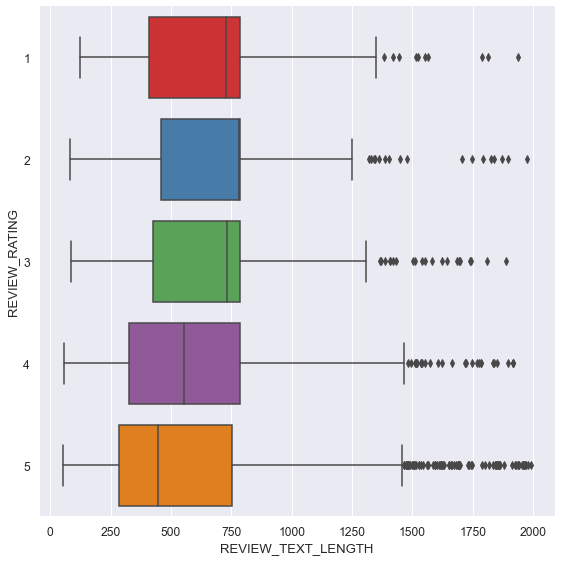

In [51]:
REVIEW_LENGTH_HOTEL_DATA['REVIEW_RATING'] = REVIEW_LENGTH_HOTEL_DATA['REVIEW_RATING'].astype("category")
REVIEW_MAX_LENGTH = 2000

plot = sns.catplot(data=REVIEW_LENGTH_HOTEL_DATA[REVIEW_LENGTH_HOTEL_DATA["REVIEW_TEXT_LENGTH"]< REVIEW_MAX_LENGTH], x="REVIEW_TEXT_LENGTH", y="REVIEW_RATING", kind="box", height=8, palette="Set1")

## Export

### PDF

In [52]:
IPYNB_PATH = "./exploratory_analysis.ipynb"
IPYNB_OUTPUT_FILE_PATH = '../docs/'

# HTML
!jupyter nbconvert $IPYNB_PATH --to html --output-dir $IPYNB_OUTPUT_FILE_PATH

# PDF
!jupyter nbconvert $IPYNB_PATH --to pdf --output-dir $IPYNB_OUTPUT_FILE_PATH

[NbConvertApp] Converting notebook ./exploratory_analysis.ipynb to html
[NbConvertApp] Writing 1264219 bytes to ..\docs\exploratory_analysis.html
[NbConvertApp] Converting notebook ./exploratory_analysis.ipynb to pdf
[NbConvertApp] Support files will be in exploratory_analysis_files\
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Writing 103452 bytes to noteb

### DATA

#### Cleaning

In [53]:
OUTPUT_CLEAN_FILE_PATH = '../data/exploratory_analysis/tripadvisor_hotels_clean.csv'
HOTEL_DATA.to_csv(OUTPUT_CLEAN_FILE_PATH)